In [73]:
import cv2
import numpy as np
import skimage.io as io
from skimage.filters import threshold_otsu

In [87]:
def dilation(img, f):
    n, m = img.shape
    f_size = len(f)
    copied = img.copy()
    
    for i in range(f_size // 2, n - f_size // 2):
        for j in range(f_size // 2, m - f_size // 2):
            square = copied[i - f_size // 2 : i + f_size // 2 + 1, j - f_size // 2 : j + f_size // 2 + 1]

            if ((square.astype(np.bool) & f.astype(np.bool)) == f).any():
                img[i][j] = 1
            else:
                img[i][j] = 0
                
    return img

def erosion(img, f):
    n, m = img.shape
    f_size = len(f)
    copied = img.copy()
    
    for i in range(f_size // 2, n - f_size // 2):
        for j in range(f_size // 2, m - f_size // 2):
            square = copied[i - f_size // 2 : i + f_size // 2 + 1, j - f_size // 2 : j + f_size // 2 + 1]

            if ((square.astype(np.bool) & f.astype(np.bool)) == f).all():
                img[i][j] = 1
            else:
                img[i][j] = 0
                
    return img

def show_image(img):
    io.imshow(img)
    io.show()

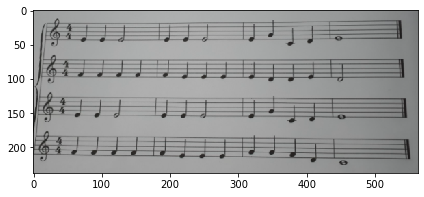

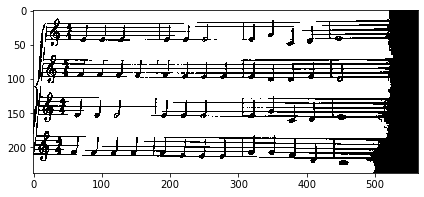

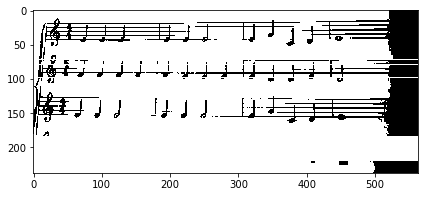

In [121]:
img = cv2.imread('sample2.png')
img_copy = img.copy()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150,apertureSize = 3)

lines = cv2.HoughLines(edges, 1,np.pi/180, img.shape[1]//2)

thresh = threshold_otsu(gray)
gray[gray > thresh] = 255
gray[gray <= thresh] = 0

show_image(img)
show_image(gray)

gray_copy = gray.copy()

for line in lines:
    for rho, theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = max(int(x0 + 1000*(-b)), 0)
        y1 = max(int(y0 + 1000*(a)), 0)
        x2 = min(int(x0 - 1000*(-b)), img.shape[1])
        y2 = min(int(y0 - 1000*(a)), img.shape[0])
        
        for y in range(y1, y2 + 1):
            for x in range(x1, x2):
                if (gray[y - 1: y + 1, x] == 255).sum():
                    gray_copy[y][x] = 255
#                     print("here")

        gray[y1:y2 + 1, x1:x2+1] = 255
        
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('houghlines3.jpg',img)

show_image(gray_copy)

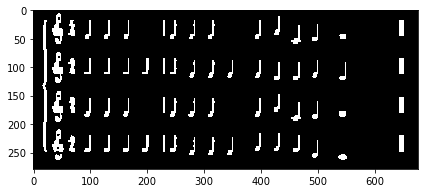

In [88]:
erosion(gray, f1)
show_image(gray * 255)